## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

### Task 1.1
(20% of the grade)

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

In [2]:
exact_integral = 2 / 3

2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [3]:
def midpoint_rule(f, a, b, eps):
    integral = np.inf
    d = 0.1
    n = 1

    while d>=eps:
        h = (b - a) / n #interval length
        points = np.arange(a + h / 2, b, h)
        I = h * np.sum([f(point) for point in points])
        d = np.abs(I - integral)
        integral = I
        n *= 2 
    return (I, n / 2)

def f(x):
    return 7*x**3 - 8*x**2 - 2*x + 3
result, N = midpoint_rule(f, -1, 1, 1e-10)
print('Estimate intgral:', result,'\nNumber of intervals: ', N, '\nError: ', abs(result-exact_integral))

Estimate intgral: 0.6666666666860692 
Number of intervals:  524288.0 
Error:  1.9402590645256623e-11


3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [4]:
from scipy.special import roots_legendre
for n in range(1, 7):
    nodes, weights = roots_legendre(n)
    print('Estimated value: %.10f\nNodes amount: %i\n\n' % (sum(weights * f(nodes)), n))

Estimated value: 6.0000000000
Nodes amount: 1


Estimated value: 0.6666666667
Nodes amount: 2


Estimated value: 0.6666666667
Nodes amount: 3


Estimated value: 0.6666666667
Nodes amount: 4


Estimated value: 0.6666666667
Nodes amount: 5


Estimated value: 0.6666666667
Nodes amount: 6




Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

Number of nodes drastically lower in compare with first method due to the correlation with polynimial degree.

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

With $x =\frac{x-5} 5$, we may calculate the next integral: 

$5\int_{-1}^1 (7 (5 x+5)^3-8 (5 x+5)^2-3 (5 x+5)+3) dx = \frac{44130}{3}$


In [5]:
exact_integral = 44140/3
def f(x):
    return 5*(7*(5*x+5)**3-8*(5*x+5)**2-3*(5*x+5)+3)
for n in range(1,7):
    nodes, weights = roots_legendre(n)
    I = sum(weights * f(nodes))
    print('Estimated value:', I, '\nNodes amount:', n, "\nError:", abs(I - exact_integral),'\n\n')

Estimated value: 6630.0 
Nodes amount: 1 
Error: 8083.333333333334 


Estimated value: 14713.333333333336 
Nodes amount: 2 
Error: 1.8189894035458565e-12 


Estimated value: 14713.333333333332 
Nodes amount: 3 
Error: 1.8189894035458565e-12 


Estimated value: 14713.333333333336 
Nodes amount: 4 
Error: 1.8189894035458565e-12 


Estimated value: 14713.333333333332 
Nodes amount: 5 
Error: 1.8189894035458565e-12 


Estimated value: 14713.333333333334 
Nodes amount: 6 
Error: 0.0 




Compare the result with the exact value of the integral.

### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

 Chebyshev polynomials of fist kind are suitable for this integral

In [6]:
from scipy.special import roots_chebyt
def f(x):
    return np.cos(2 * np.pi * x) / 2
n = 1
integral = np.inf
d = 0.1
eps = 10 ** (-40)
while d>= eps:
    nodes, weights = roots_chebyt(n)
    I = sum(weights * f(nodes))
    d = abs(integral - I)
    integral = I
    n += 1
    
print('Estimated value:', I,'\nNumber of nodes:',(n - 1))

Estimated value: 0.3460101588122644 
Number of nodes: 17


## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

We need to use shifted Legendre polynomials to find weights in this case


Degree: 5 Error: -7.105150502234688 


Degree: 6 Error: -9.389797988788592 


Degree: 7 Error: -11.821947569644847 


Degree: 8 Error: -14.51734886134127 


Degree: 9 Error: -15.293480122824043 


Degree: 10 Error: -14.600379320123647 


Degree: 11 Error: -15.47746851547134 


Degree: 12 Error: -14.7047462288818 


Degree: 13 Error: -14.878445597999475 


Degree: 14 Error: -15.132863431947909 




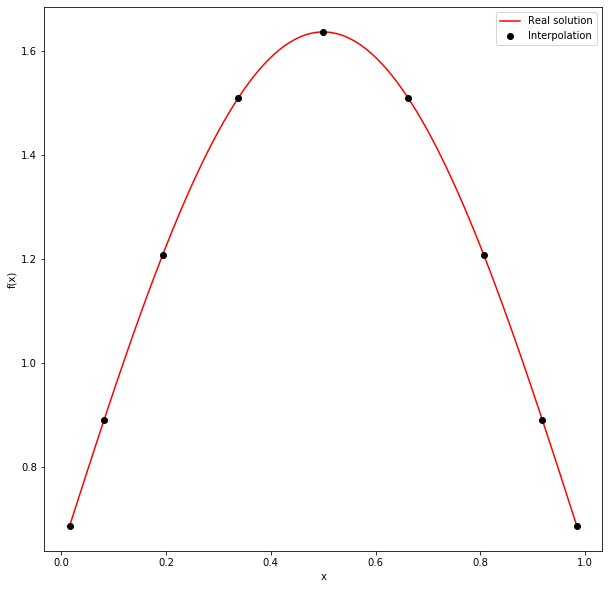

In [19]:
from scipy.special import roots_sh_legendre
def p(n):
    k=1/2*np.ones([n,n])
    nodes, weights = roots_sh_legendre(n)
    return nodes, np.linalg.solve(weights*k-np.eye(n),-np.sin(np.pi*nodes))

def g(x):
    return np.sin(np.pi*x)+2/np.pi


for n in range(5,15):
    nodes, f = p(n)
    d = np.log10(np.linalg.norm(g(nodes)-f))
    print("Degree:", n, "Error:",d,'\n\n')

nodes_, f_ = p(9)
x_lin = np.linspace(min(nodes_), max(nodes_), 100)
plt.figure(figsize=(10,10))
plt.plot(x_lin, g(x_lin), '-', label='Real solution', color='red')
plt.plot(nodes_, f_, 'o', label="Interpolation", color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

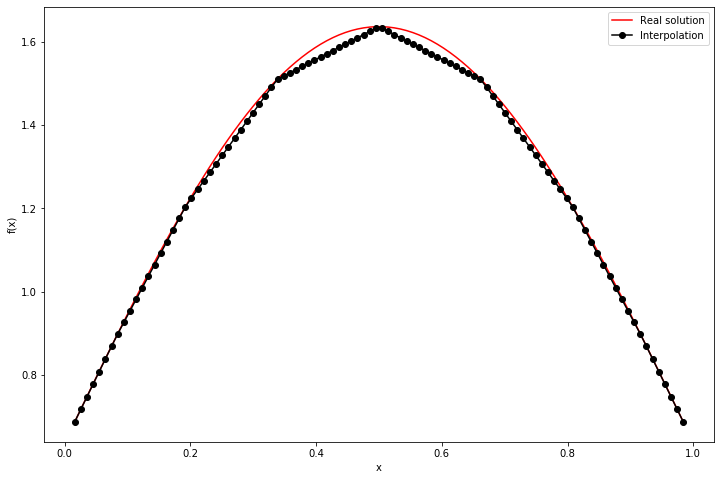

Absolute error: 0.1529849513


In [35]:
from scipy.interpolate import interp1d
grid = np.linspace(min(nodes_), max(nodes_), 100)
f = interp1d(nodes_, f_)

plt.figure(figsize=(12,8))
plt.plot(x_lin, g(x_lin), '-', label='Real solution', color = 'red')
plt.plot(grid, f(grid), 'o-', label='Interpolation', color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
print('Absolute error: %.10f' % np.linalg.norm(f(grid) - g(grid)))
#'Ой-ой. Что-то пошло не так. Большая ошибка вышла'

2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

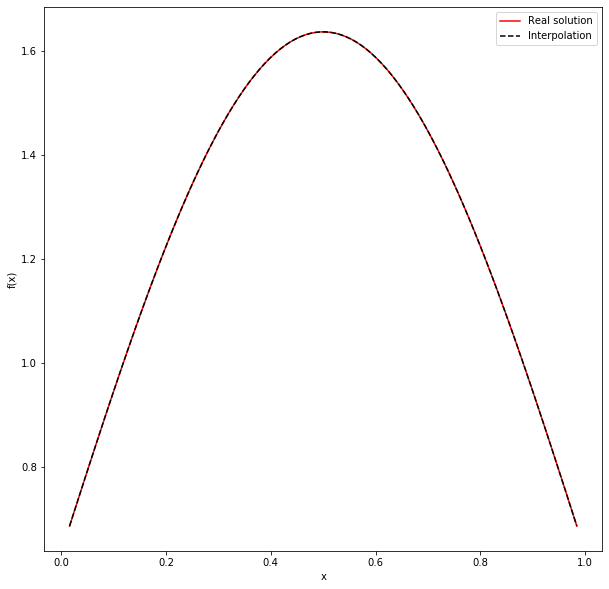

Absolute error: 1.5973327738214759e-15


In [34]:
N = len(f_)
nodes, weights = roots_sh_legendre(N)
def f(x):
    return np.sin(np.pi * x) + 0.5 * weights @ f_

plt.figure(figsize=(10,10))
plt.plot(x_lin, g(x_lin), '-', label='Real solution', color= 'red')
plt.plot(x_lin, f(x_lin), '--', label='Interpolation', color = 'black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
print('Absolute error:', np.linalg.norm(f(grid) - g(grid)))

New interpolation fits better!